In [16]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
boston=pd.read_csv("part2_data/Boston_house.csv")

In [5]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [7]:
boston_data=boston.drop(['Target'],axis=1)

In [8]:
target=boston[['Target']]
rm=boston[['RM']]
lstat=boston[['LSTAT']]
crim=boston[['CRIM']]

In [26]:
crim1=sm.add_constant(crim, has_constant="add")
rm1=sm.add_constant(rm, has_constant="add")
lstat1=sm.add_constant(lstat, has_constant="add")

In [27]:
model1=sm.OLS(target,crim1)
fitted_model1=model1.fit()
model2=sm.OLS(target,rm1)
fitted_model2=model2.fit()
model3=sm.OLS(target,lstat1)
fitted_model3=model3.fit()

In [28]:
print(fitted_model1.summary())
print(fitted_model2.summary())
print(fitted_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.17e-19
Time:                        15:06:38   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

In [29]:
pred1=fitted_model1.predict(crim1)
pred2=fitted_model2.predict(rm1)
pred3=fitted_model3.predict(lstat1)

### 다중선형회귀분석
crim, rm , lstat 세개의 변수를 통한 다중 회귀 적합

In [30]:
# bostan data 에서 crim,rm ,lstat 변수만 뽑아오기

In [31]:
x_data=boston[['CRIM',"RM","LSTAT"]]

In [32]:
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [33]:
# 상수항 추가
x_data1 = sm.add_constant(x_data,has_constant="add")

In [34]:
# 회구모델 적합
multi_model=sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          1.01e-112
Time:                        15:06:38   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 단순선형회귀모델의 회귀 계수
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [36]:
# 다중선형회귀모델의 회귀 계수
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 행렬연산을 통해 beta 구하기

In [44]:
from numpy import linalg # 행렬 연산을 통해  beta 구하기 --> (X'X)-1 X'Y

# linalg 역행렬 구하기
ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba,x_data1.T),target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [45]:
# y_hat 구하기
pred4= fitted_multi_model.predict(x_data1)

## residual plot

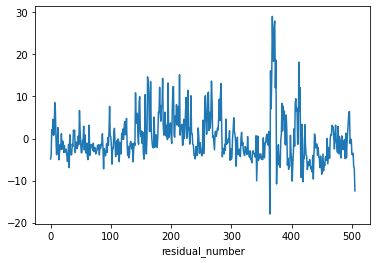

In [48]:
fitted_model4=fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

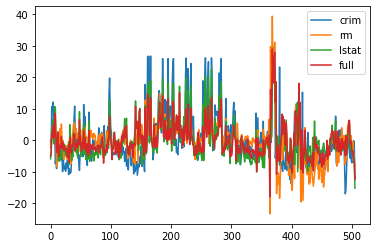

In [50]:
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
fitted_multi_model.resid.plot(label="full")
plt.legend()

# R-square 가 높을수록 잔차가 적어짐# R-square 가 높을수록 잔차가 적어짐